In [1]:
# Function 1
# Generate image with QR code from any url pasted into "url" variable

import qrcode
from PIL import Image

def generate_qr_code(url: str, output_file: str = "qr_code.png"):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(url)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(output_file)
    return Image.open(output_file)

url = "https://www.google.com/"
img = generate_qr_code(url)
img.show()

In [2]:
# Function 2
# Take a text file in sample txt format and create an Excel 

import pandas as pd
import re
import json

'''
sample.txt
{
	"sheet_name": [
	{
		"c1": "10",
		"c2": "A10", 
		"c3": "W3"
		},
		{
		"c1": "20",
		"c2": "B10",
		"c3": "W4"
		}
	]
}
'''

file_name = 'sample.txt'

def txt_to_xlsx(input_file: str, output_file: str):
    # Read the text file content
    with open(input_file, 'r') as file:
        content = file.read()

    # Extract the first word in double quotes
    sheet_name = re.findall(r'"([^"]*)"', content)[0]

    # Load the JSON data from the content
    json_data = json.loads(content)

    # Convert the JSON data to a DataFrame
    df = pd.DataFrame(json_data[sheet_name])

    # Save the DataFrame as an xlsx file
    df.to_excel(output_file, sheet_name=sheet_name, index=False)

# Sample usage
txt_to_xlsx(file_name, file_name+'.xlsx')

In [3]:
# Function 3
# Converts a JSON format to Excel with multiple data sheets

import json
import pandas as pd

'''
sample2.json
{
	"start":"Begin",
	"end":"Finish",
	"source": [
	{
		"location": "10",
		"product": "A10", 
		"new": "W3"
		},
		{
		"location": "20",
		"product": "B10",
		"new": "W4"
		}
	],
	"coordinates":	[
	{
		"index": 1,
		"lat": -20.09,
		"long": null
		}
		]
}
'''

def json_to_excel(json_file_path, excel_file_path):
    # Load JSON data from file
    with open(json_file_path) as f:
        json_data = json.load(f)

    # Create dictionary of sheets and rows
    sheets = {}
    for table_name, table_data in json_data.items():
        for row in table_data:
            if table_name not in sheets:
                sheets[table_name] = []
            sheets[table_name].append(row)

    # Write data to Excel file
    with pd.ExcelWriter(excel_file_path) as writer:
        for sheet_name, sheet_data in sheets.items():
            df = pd.DataFrame(sheet_data)
            df.to_excel(writer, sheet_name=sheet_name, index=False)

# Execution
            
file_name = 'sample2'

input_file = file_name + '.json'
output_file = file_name + '.xlsx'
        
json_to_excel(input_file, output_file)

In [4]:
# Function 4
# Converts a json format to Excel with multiple data sheets with boolean values

import json
import pandas as pd

'''
sample3.json
{
	"start":false,
	"end":"Finish",
	"source": [
	{
		"location": "10",
		"product": "A10", 
		"new": "W3"
		},
		{
		"location": "20",
		"product": "B10",
		"new": "W4"
		}
	],
	"coordinates":	[
	{
		"index": 1,
		"lat": -20.09,
		"long": null
		}
		]
}
'''

def json_to_excel(json_file_path, excel_file_path):
    # Load JSON data from file
    with open(json_file_path) as f:
        json_data = json.load(f)

    def convert_bool_to_str(obj):
        if isinstance(obj, bool):
            return str(obj)
        if isinstance(obj, dict):
            return {k: convert_bool_to_str(v) for k, v in obj.items()}
        if isinstance(obj, list):
            return [convert_bool_to_str(item) for item in obj]
        return obj

    # Convert boolean values to strings
    json_data = convert_bool_to_str(json_data)

    # Create dictionary of sheets and rows
    sheets = {}
    for table_name, table_data in json_data.items():
        for row in table_data:
            if table_name not in sheets:
                sheets[table_name] = []
            sheets[table_name].append(row)

    # Write data to Excel file
    with pd.ExcelWriter(excel_file_path) as writer:
        for sheet_name, sheet_data in sheets.items():
            df = pd.DataFrame(sheet_data)
            df.to_excel(writer, sheet_name=sheet_name, index=False)

# Execution
            
file_name = 'sample3'

input_file = file_name + '.json'
output_file = file_name + '.xlsx'
        
json_to_excel(input_file, output_file)

In [5]:
# Function 5 (can use output from function: 3 or 4)
# Extracts metadata from the Excel file stored in a specific row from multiple sheets as new sheet

import pandas as pd
from openpyxl import load_workbook

def extract_values_from_excel(excel_file, row_number):
    # Load Excel file using pandas
    xls = pd.ExcelFile(excel_file)
    
    # Create an empty list to store tuples of sheet name and values
    data = []
    
    # Iterate through each sheet in the Excel file
    for sheet_name in xls.sheet_names:
        # Read values from specified row in current sheet
        df = pd.read_excel(excel_file, sheet_name=sheet_name, header=None, skiprows=row_number-1, nrows=1)
        
        # Append each value to data list as a separate row
        for value in df.values.tolist()[0]:
            data.append((sheet_name, value))
    
    # Create a new list of tuples with each value in a separate row and duplicate sheet name
    new_data = []
    for tup in data:
        for value in tup[1:]:
            new_data.append((tup[0], value))
    
    # Create a new DataFrame from new_data list
    df_new = pd.DataFrame(new_data, columns=['Sheet name', 'Values'])
    
    # Write new DataFrame to a new sheet in original Excel file
    book = load_workbook(excel_file)
    writer = pd.ExcelWriter(excel_file, engine='openpyxl') 
    writer.book = book
    df_new.to_excel(writer, index=False)
    writer.save()

file_name = output_file

extract_values_from_excel(file_name, 1)

In [ ]:
# Function 6
from datetime import timedelta, datetime
# Shows a specific time x hours from now
def arrival_time(hours=0):
    now = datetime.now()
    when = now + timedelta(hours=hours)
    output = when.strftime("%A %H:%M")
    return print(f"{hours} hours from now will be {output}")
    
hours = 120
arrival_time(hours)

In [16]:
# Function 7
import pandas as pd
# Aggregates the rows of a DataFrame based on a specified key and aggregation type.
def rows_per_value(df, key, col_name, aggregation):
    """  
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    key (str): The column name to group by.
    col_name (str): The column name from which to take values for aggregation.
    aggregation (str): The type of aggregation ('count', 'mean', 'median', 'max', 'min', 'sum').

    Returns:
    pd.DataFrame: The aggregated DataFrame with the column name corresponding to the aggregation type.
    """
    
    # Dictionary to map aggregation types to Pandas functions
    aggregation_functions = {
        'count': 'count',
        'mean': 'mean',
        'median': 'median',
        'max': 'max',
        'min': 'min',
        'sum': 'sum'
    }
    
    # Validate the aggregation type
    if aggregation not in aggregation_functions:
        raise ValueError(f"Invalid aggregation type. Choose from {list(aggregation_functions.keys())}")
    
    # Perform the aggregation
    if aggregation == 'count':
        data = df.groupby(key).agg({col_name: 'count'})
    else:
        data = df.groupby(key).agg({col_name: aggregation_functions[aggregation]})
    
    # Rename the column to the type of aggregation
    data.columns = [aggregation]
    
    return data

# Example usage:
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'A', 'B', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
})
result = rows_per_value(df, 'Category', 'Values', 'sum')
print(result)


          sum
Category     
A          80
B          70
C          60


In [30]:
# Function 8
import pandas as pd
# Change column names to all lower case with underscope instead of spaces 
# with header row specific as second parameter (default = 1)
def update_excel_column_names(input_path: str, header_row: int = 1):
    # Load the Excel file
    xls = pd.ExcelFile(input_path, engine='openpyxl')
    
    # Dictionary to store dataframes
    sheet_dfs = {}
    
    # Iterate through each sheet
    for sheet_name in xls.sheet_names:
        # Read the sheet with the specified header row
        df = pd.read_excel(xls, sheet_name=sheet_name, header=header_row-1)
        
        # Update column names
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        
        # Store the dataframe in the dictionary
        sheet_dfs[sheet_name] = df
    
    # Write the updated dataframes back to the Excel file
    with pd.ExcelWriter(input_path, engine='openpyxl') as writer:
        for sheet_name, df in sheet_dfs.items():
            df.to_excel(writer, sheet_name=sheet_name, index=False)

# Example usage
input_path = 'data/input/metadata_template - Copy.xlsx'
update_excel_column_names(input_path, 1)


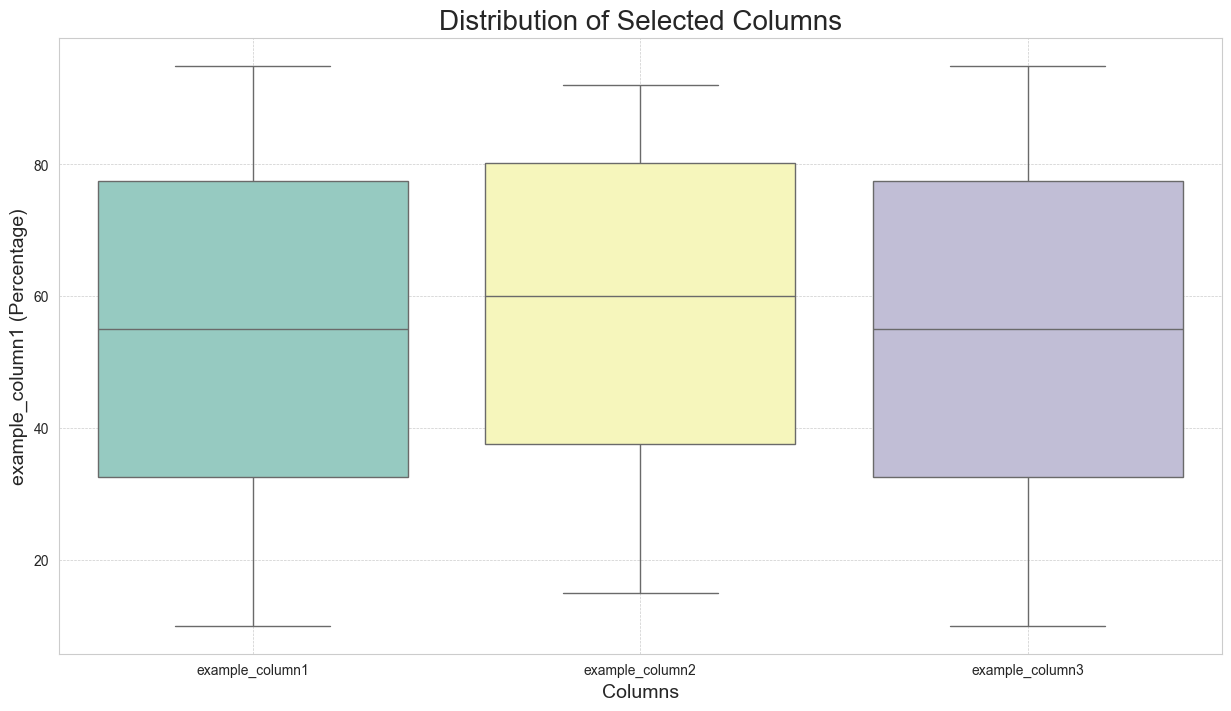

In [29]:
# Function 9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot for passed column names with percentage indication for (0,1)
def plot_box_charts(df, column_names):
    # Check if column names are provided as a list
    if not isinstance(column_names, list):
        raise ValueError("The column_names parameter should be a list of column names.")

    # Create a copy of the DataFrame to avoid modifying the original data
    df_copy = df.copy()

    # Initialize a flag for percentage conversion
    percentage_flags = []

    # Iterate over each column to check if values are between 0 and 1
    for column in column_names:
        if df_copy[column].between(0, 1).all():
            df_copy[column] = df_copy[column] * 100
            percentage_flags.append(True)
        else:
            percentage_flags.append(False)

    # Set the plot size and style
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")
    
    # Create a box plot for each column
    box_plot = sns.boxplot(data=df_copy[column_names], palette="Set3")

    # Customize the plot
    box_plot.set_title("Distribution of Selected Columns", fontsize=20)
    box_plot.set_ylabel("Values", fontsize=14)
    box_plot.set_xlabel("Columns", fontsize=14)
    box_plot.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add percentage label to y-axis if applicable
    for idx, column in enumerate(column_names):
        if percentage_flags[idx]:
            box_plot.set_ylabel(f'{column} (Percentage)', fontsize=14)
            break  # Since we can only label the y-axis once, we break after the first match

    # Improve the background and grid style
    box_plot.set_facecolor('white')
    box_plot.xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
    box_plot.yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
    
    # Display the plot
    plt.show()

# Example usage:
df = pd.DataFrame({
    'example_column1': [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 0.6, 0.3, 0.8, 0.4],
    'example_column2': [0.15, 0.25, 0.55, 0.75, 0.85, 0.92, 0.65, 0.35, 0.82, 0.45],
    'example_column3': [10, 20, 50, 70, 90, 95, 60, 30, 80, 40]
})
plot_box_charts(df, ['example_column1', 'example_column2', 'example_column3'])


In [20]:
dx

,D
C E,
7,1
8,1
